In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv('weatherHistory.csv')
data_date=data['Formatted Date']
data_temperature=data['Temperature (C)']
print(data_date.shape)
print(data_temperature.shape)

(96453,)
(96453,)


In [4]:
new_date=[]
for d in data_date:
    period = pd.Period(d, freq='H')
    new_date.append(period.day_of_year)
new_date=np.array(new_date)

In [5]:
values, counts=np.unique(new_date,return_counts=True)

In [6]:
avg=[]
for i in range(0,len(new_date),24):
    avg.append(np.mean(data_temperature[i:i+24]))
avg=np.array(avg)

In [8]:
day_of_year=[]
for k in range(0,len(new_date),24):
    day_of_year.append(new_date[k])
day_of_year=np.array(day_of_year)

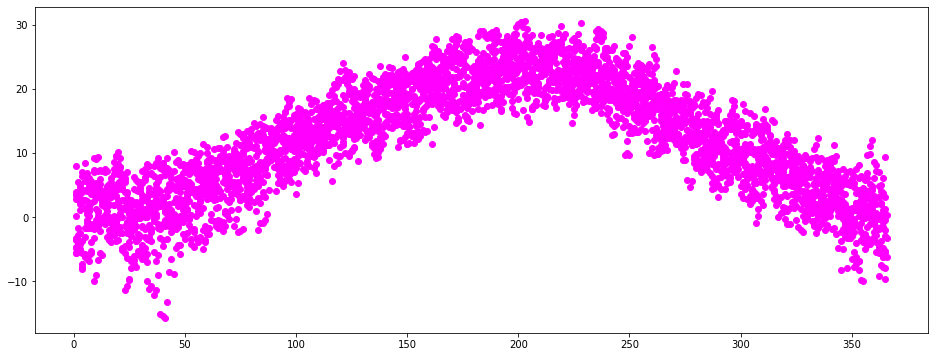

In [9]:
plt.figure(figsize=(16,6))
plt.scatter(day_of_year,avg,c='magenta')

In [10]:
#perceptron
def fit(X,Y):
    fig1, (ax1, ax2) = plt.subplots(1, 2)

    w=np.random.rand(1,1)
    lr=0.00001
    b=np.random.rand(1,1)
    epochs=2
    errors=[]
    for j in range(epochs):
        for i in range(len(X)):
            y_pred=np.matmul(X[i],w)+b
            e=Y[i]-y_pred

            Y_pred = np.matmul(X, w)+b
            error = np.mean(np.abs(Y- Y_pred))
            errors.append(error)
    
            w= w + lr * X[i]* e
            b+=lr*e

        ax1.clear()
        ax1.scatter(X,Y,c='magenta')
        ax1.plot(X,Y_pred,c='blue',lw=2)

        ax2.clear()
        ax2.set_title('Loss')
        ax2.plot(errors, '-b', lw=1)
        plt.pause(0.001)


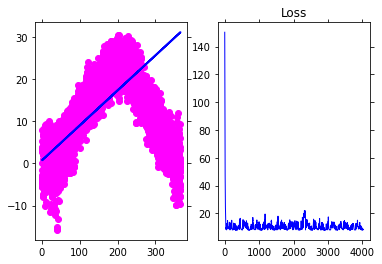

In [11]:
day_of_year=day_of_year.reshape(4019,1)
avg=avg.reshape(4019,1)
fit(day_of_year,avg)